https://fivequestionz.home.blog/2020/07/30/how-to-map-the-photo-location-of-flickr-using-python-and-qgis/
https://www.flickr.com/services/api/flickr.photos.search.html

In [1]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
import os, time, sys
import json
import pandas as pd
import calendar
from IPython.display import Image
import datetime
import matplotlib.pyplot as plt

In [2]:
key = '764a02ba91e2a7600cdfb36e3519d7c1'
secret = 'd942c96a0dca7cba'

In [3]:
time_pairs = []
utime_pairs = []
for i in range(2000, 2023):
    time_begin = datetime.datetime(i, 1, 2, 0, 0, 0)
    utime_begin = time.mktime(time_begin.timetuple())
    time_end = datetime.datetime(i+1, 1, 1, 23, 59, 59)
    utime_end = time.mktime(time_end.timetuple())
    time_pairs.append((time_begin, time_end))
    utime_pairs.append((utime_begin, utime_end))
    
begins = [pair[0].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs]
ends = [pair[1].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs]

In [4]:
flickr = FlickrAPI(key, secret, format='parsed-json')
totals = []
for pair in utime_pairs:
    result = flickr.photos.search(text="Kyiv",
                                  per_page=1,
                                  has_geo=1,
                                  extras='original_format,geo',
                                  min_upload_date=pair[0],
                                  max_upload_date=pair[1])
    total = result['photos']['total']
    totals.append(total)

In [6]:
result

{'photos': {'page': 1,
  'pages': 630,
  'perpage': 1,
  'total': 630,
  'photo': [{'id': '52064073843',
    'owner': '46394744@N06',
    'secret': 'ff6d211633',
    'server': '65535',
    'farm': 66,
    'title': 'Pyrohoshcha Church',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0,
    'latitude': '50.463417',
    'longitude': '30.516766',
    'accuracy': '16',
    'context': 0,
    'place_id': 'FLvm0wNXW7zM.Xw',
    'woeid': '696877',
    'geo_is_public': 1,
    'geo_is_contact': 0,
    'geo_is_friend': 0,
    'geo_is_family': 0}]},
 'stat': 'ok'}

In [9]:
one_pic = result['photos']['photo'][0]
one_pic
img_url = f"https://live.staticflickr.com/{one_pic['server']}/{one_pic['id']}_{one_pic['originalsecret']}_o.{one_pic['originalformat']}"
print(img_url)
Image(img_url)

KeyError: 'format'

In [14]:
df = pd.DataFrame(list(zip(begins, ends, totals)), columns =['Min upload date', 'Max upload date', 'Total'])
df

,Min upload date,Max upload date,Total
0,2000-01-02 00:00:00,2001-01-01 23:59:59,8
1,2001-01-02 00:00:00,2002-01-01 23:59:59,0
2,2002-01-02 00:00:00,2003-01-01 23:59:59,0
3,2003-01-02 00:00:00,2004-01-01 23:59:59,0
4,2004-01-02 00:00:00,2005-01-01 23:59:59,0
5,2005-01-02 00:00:00,2006-01-01 23:59:59,58
6,2006-01-02 00:00:00,2007-01-01 23:59:59,1101
7,2007-01-02 00:00:00,2008-01-01 23:59:59,1647
8,2008-01-02 00:00:00,2009-01-01 23:59:59,1227
9,2009-01-02 00:00:00,2010-01-01 23:59:59,1725


According to the documentation: "Please note that Flickr will return at most the first 4,000 results for any given search query."

Need to break up the following years because the total number of photos exceed 4000: 2014, 2015, 2017, 2019

In [10]:
time_pairs_new = []
utime_pairs_new = []
exceps = [2014, 2015, 2017, 2019]
for i in range(2000, 2023):
    if i not in exceps:
        time_begin = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin = time.mktime(time_begin.timetuple())
        time_end = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end = time.mktime(time_end.timetuple())
        time_pairs_new.append((time_begin, time_end))
        utime_pairs_new.append((utime_begin, utime_end))
    elif i != 2019:
        time_begin_0 = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin_0 = time.mktime(time_begin_0.timetuple())
        
        time_end_0 = datetime.datetime(i, 6, 1, 23, 59, 59)
        utime_end_0 = time.mktime(time_end_0.timetuple())
        
        time_begin_1 = datetime.datetime(i, 6, 2, 0, 0, 0)
        utime_begin_1 = time.mktime(time_begin_1.timetuple())
        
        time_end_1 = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end_1 = time.mktime(time_end_1.timetuple())
        
        time_pairs_new.append((time_begin_0, time_end_0))
        time_pairs_new.append((time_begin_1, time_end_1))
        utime_pairs_new.append((utime_begin_0, utime_end_0))
        utime_pairs_new.append((utime_begin_1, utime_end_1))
    else:
        time_begin_0 = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin_0 = time.mktime(time_begin_0.timetuple())
        
        time_end_0 = datetime.datetime(i, 6, 1, 23, 59, 59)
        utime_end_0 = time.mktime(time_end_0.timetuple())
        
        time_begin_1 = datetime.datetime(i, 6, 2, 0, 0, 0)
        utime_begin_1 = time.mktime(time_begin_1.timetuple())
        
        time_end_1 = datetime.datetime(i, 9, 1, 23, 59, 59)
        utime_end_1 = time.mktime(time_end_1.timetuple())
        
        time_begin_2 = datetime.datetime(i, 9, 2, 0, 0, 0)
        utime_begin_2 = time.mktime(time_begin_1.timetuple())
        
        time_end_2 = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end_2 = time.mktime(time_end_1.timetuple())
        
        time_pairs_new.append((time_begin_0, time_end_0))
        time_pairs_new.append((time_begin_1, time_end_1))
        time_pairs_new.append((time_begin_2, time_end_2))
        utime_pairs_new.append((utime_begin_0, utime_end_0))
        utime_pairs_new.append((utime_begin_1, utime_end_1))
        utime_pairs_new.append((utime_begin_2, utime_end_2))
    
begins_new = [pair[0].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs_new]
ends_new = [pair[1].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs_new]

In [ ]:
totals_new = []
for pair in utime_pairs_new:
    result = flickr.photos.search(text="Kyiv",
                                  per_page=1,
                                  has_geo=1,
                                  extras='original_format,geo',
                                  min_upload_date=pair[0],
                                  max_upload_date=pair[1])
    total = result['photos']['total']
    totals_new.append(total)

In [12]:
df_new = pd.DataFrame(list(zip(begins_new, ends_new, totals_new)), columns =['Min upload date', 'Max upload date', 'Total'])
df_new

,Min upload date,Max upload date,Total
0,2000-01-02 00:00:00,2001-01-01 23:59:59,8
1,2001-01-02 00:00:00,2002-01-01 23:59:59,0
2,2002-01-02 00:00:00,2003-01-01 23:59:59,0
3,2003-01-02 00:00:00,2004-01-01 23:59:59,0
4,2004-01-02 00:00:00,2005-01-01 23:59:59,0
5,2005-01-02 00:00:00,2006-01-01 23:59:59,58
6,2006-01-02 00:00:00,2007-01-01 23:59:59,1089
7,2007-01-02 00:00:00,2008-01-01 23:59:59,1671
8,2008-01-02 00:00:00,2009-01-01 23:59:59,1243
9,2009-01-02 00:00:00,2010-01-01 23:59:59,1734


In [15]:
df.Total.sum(), df_new.Total.sum()

(52452, 51450)

In [309]:
t0 = time.time()
photos = []
for pair in utime_pairs_new:
    for i in range(1, 11):
        result = flickr.photos.search(text="Kyiv",
                                      per_page=400,
                                      page=i,
                                      has_geo=1,
                                      extras='original_format,geo',
                                      min_upload_date=pair[0],
                                      max_upload_date=pair[1])
        photos += result['photos']['photo']
t1 = time.time()
print("Run time: %.2fs" % (t1 - t0))
print(f"Fetched {len(photos)} photos")

Run time: 593.81s
Fetched 43044 photos


In [312]:
photos_json = json.dumps(photos)

In [316]:
with open("kyiv_photos.json", "w") as file:
    file.write(photos_json)

In [327]:
photos_df = pd.DataFrame(photos)

In [328]:
photos_df

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,originalsecret,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
0,663520483,9453282@N07,c7981c58e6,1012,2,Kyiv-5,1,0,0,e332e9b463,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
1,664375126,9453282@N07,2816c87ba4,1004,2,Kyiv-6,1,0,0,d5003ee2f2,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
2,663520421,9453282@N07,5ab91e9f18,1012,2,Kyiv-4,1,0,0,4285bc4239,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
3,664374936,9453282@N07,5cdcacfd29,1162,2,Kyiv-2,1,0,0,4ef8b33eb4,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
4,663520365,9453282@N07,467a4fff89,1023,2,Kyiv-3,1,0,0,5a392a6c5a,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43039,51823687217,94589194@N02,c759f01599,65535,66,UR-RWB,1,0,0,82fca7df00,...,50.350867,30.898457,0,0,,8129116,1,0,0,0
43040,51816992391,131947100@N08,f815cf4760,65535,66,Old walls,1,0,0,a53bdce50f,...,50.448596,30.460388,16,0,u8vCwI9XWr2pMfw,687055,1,0,0,0
43041,51808133795,154965314@N05,f4bf6716a5,65535,66,HA-LYA A56A1512@L6U,1,0,0,b4421c520c,...,56.917558,23.965301,13,0,RXYF_WVVV78nzak,455499,1,0,0,0
43042,51806070590,94589194@N02,94a0a0a3d1,65535,66,HA-LPT Nurnberg - Kyiv,1,0,0,ff63f733e6,...,49.494613,11.077307,0,0,,2876328,1,0,0,0


In [339]:
photos_df[['latitude', 'longitude']].dtypes

latitude     object
longitude    object
dtype: object

In [342]:
photos_df = photos_df.astype({'latitude': 'float', 'longitude': 'float'})

In [343]:
photos_df[['latitude', 'longitude']].dtypes

latitude     float64
longitude    float64
dtype: object

In [344]:
photos_df[['latitude', 'longitude']].describe()

,latitude,longitude
count,43044.000000,43044.000000
mean,50.465079,29.913300
std,1.372835,6.773062
min,-27.535912,-122.478075
25%,50.431749,30.461096
50%,50.449334,30.518560
75%,50.461548,30.534918
max,61.499870,152.933472


In [407]:
points = photos_df[(photos_df['latitude'] <= 50.475) & (photos_df['latitude'] >= 50.425) & (photos_df['longitude'] <= 30.6) & (photos_df['longitude'] >= 30.45)]
points

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,originalsecret,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
9,74388760,13021532@N00,0e94153d2a,40,1,Kyiv Yushchenko in window 2,1,0,0,NaN,...,50.436352,30.526714,12,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
11,74388699,13021532@N00,5eecc4941f,39,1,Kyiv We Could Be 52 million! Fall in love!,1,0,0,NaN,...,50.432251,30.531692,12,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
12,74388687,13021532@N00,5c0ba4425d,43,1,Kyiv Taste of Modern England,1,0,0,NaN,...,50.456738,30.524654,12,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
13,74388666,13021532@N00,58097dc752,40,1,Kyiv Sofiiska Plosha,1,0,0,NaN,...,50.457504,30.511436,12,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
15,74388630,13021532@N00,ac55210445,36,1,Kyiv Filaret poster,1,0,0,NaN,...,50.443731,30.515213,12,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43029,51798928832,185560103@N05,79e3d14481,65535,66,Stepan Bandera's birthday,1,0,0,NaN,...,50.447125,30.530447,16,0,ki7coehXW7.vXR0,695882,1,0,0,0
43032,51880307009,59442036@N08,9da16dc990,65535,66,Independence Square (Maidan Nezalezhnosti) in ...,1,0,0,b921a3c036,...,50.451383,30.515899,9,0,,703448,1,0,0,0
43033,51879991726,59442036@N08,70db3ba14f,65535,66,Web Standards Days in Kyiv,1,0,0,9c5bdbc53f,...,50.452257,30.517272,9,0,,703448,1,0,0,0
43035,51841592555,94589194@N02,d88231018e,65535,66,Kyiv,1,0,0,59a493cf3c,...,50.426850,30.562992,0,0,f875B8ZXW73gvX8,697796,1,0,0,0


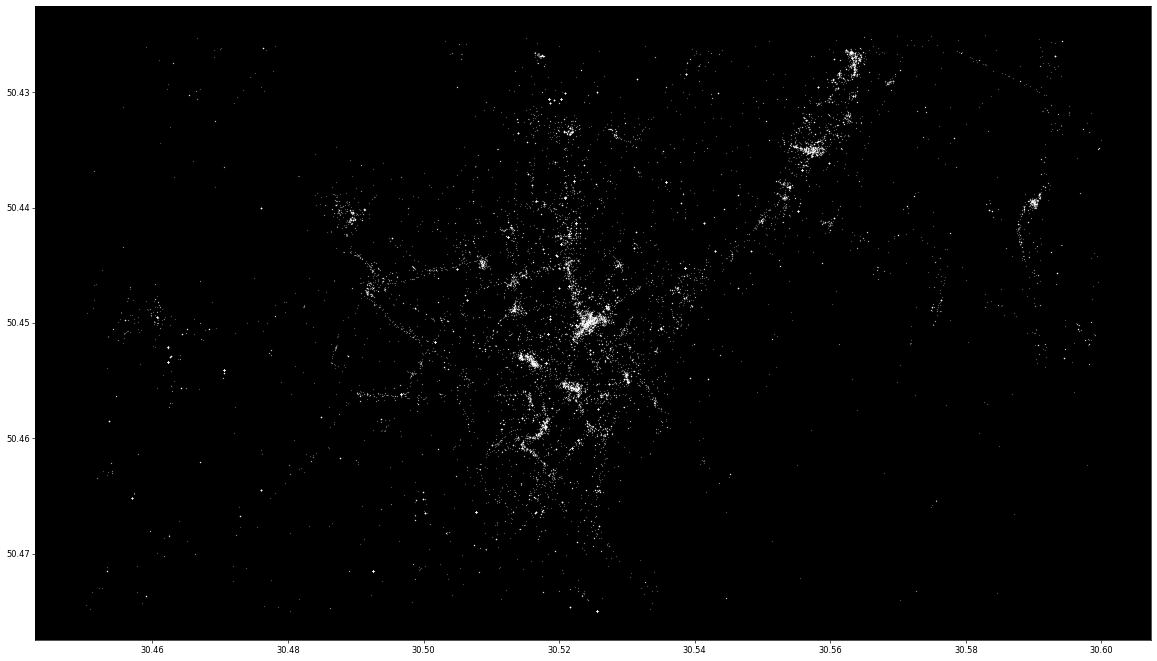

In [408]:
plt.figure(figsize=(24, 14), dpi=60)
ax = plt.axes()
ax.set_facecolor('black')

plt.scatter(x=points['longitude'], y=points['latitude'], c='white', alpha=0.3, s=0.3)
plt.gca().invert_yaxis()
plt.show()

# Search with coordinates instead of keyword

In [24]:
time_pairs_new = []
utime_pairs_new = []
exceps = [2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019]
split_2 = [2011, 2016, 2017, 2018, 2019]
split_3 = [2012, 2013]
split_4 = [2014, 2015]
for i in range(2000, 2023):
    if i in split_2:
        time_begin_0 = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin_0 = time.mktime(time_begin_0.timetuple())
        
        time_end_0 = datetime.datetime(i, 6, 1, 23, 59, 59)
        utime_end_0 = time.mktime(time_end_0.timetuple())
        
        time_begin_1 = datetime.datetime(i, 6, 2, 0, 0, 0)
        utime_begin_1 = time.mktime(time_begin_1.timetuple())
        
        time_end_1 = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end_1 = time.mktime(time_end_1.timetuple())
        
        time_pairs_new.append((time_begin_0, time_end_0))
        time_pairs_new.append((time_begin_1, time_end_1))
        utime_pairs_new.append((utime_begin_0, utime_end_0))
        utime_pairs_new.append((utime_begin_1, utime_end_1))
    elif i in split_3:
        time_begin_0 = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin_0 = time.mktime(time_begin_0.timetuple())
        
        time_end_0 = datetime.datetime(i, 6, 1, 23, 59, 59)
        utime_end_0 = time.mktime(time_end_0.timetuple())
        
        time_begin_1 = datetime.datetime(i, 6, 2, 0, 0, 0)
        utime_begin_1 = time.mktime(time_begin_1.timetuple())
        
        time_end_1 = datetime.datetime(i, 9, 1, 23, 59, 59)
        utime_end_1 = time.mktime(time_end_1.timetuple())
        
        time_begin_2 = datetime.datetime(i, 9, 2, 0, 0, 0)
        utime_begin_2 = time.mktime(time_begin_1.timetuple())
        
        time_end_2 = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end_2 = time.mktime(time_end_1.timetuple())
        
        time_pairs_new.append((time_begin_0, time_end_0))
        time_pairs_new.append((time_begin_1, time_end_1))
        time_pairs_new.append((time_begin_2, time_end_2))
        utime_pairs_new.append((utime_begin_0, utime_end_0))
        utime_pairs_new.append((utime_begin_1, utime_end_1))
        utime_pairs_new.append((utime_begin_2, utime_end_2))
    elif i in split_4:
        time_begin_0 = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin_0 = time.mktime(time_begin_0.timetuple())
        
        time_end_0 = datetime.datetime(i, 3, 1, 23, 59, 59)
        utime_end_0 = time.mktime(time_end_0.timetuple())
        
        time_begin_1 = datetime.datetime(i, 3, 2, 0, 0, 0)
        utime_begin_1 = time.mktime(time_begin_1.timetuple())
        
        time_end_1 = datetime.datetime(i, 6, 1, 23, 59, 59)
        utime_end_1 = time.mktime(time_end_1.timetuple())
        
        time_begin_2 = datetime.datetime(i, 6, 2, 0, 0, 0)
        utime_begin_2 = time.mktime(time_begin_1.timetuple())
        
        time_end_2 = datetime.datetime(i, 9, 1, 23, 59, 59)
        utime_end_2 = time.mktime(time_end_1.timetuple())
        
        time_begin_3 = datetime.datetime(i, 9, 2, 0, 0, 0)
        utime_begin_3 = time.mktime(time_begin_1.timetuple())
        
        time_end_3 = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end_3 = time.mktime(time_end_1.timetuple())
        
        time_pairs_new.append((time_begin_0, time_end_0))
        time_pairs_new.append((time_begin_1, time_end_1))
        time_pairs_new.append((time_begin_2, time_end_2))
        time_pairs_new.append((time_begin_3, time_end_3))
        utime_pairs_new.append((utime_begin_0, utime_end_0))
        utime_pairs_new.append((utime_begin_1, utime_end_1))
        utime_pairs_new.append((utime_begin_2, utime_end_2))
        utime_pairs_new.append((utime_begin_3, utime_end_3))
    else:
        time_begin = datetime.datetime(i, 1, 2, 0, 0, 0)
        utime_begin = time.mktime(time_begin.timetuple())
        
        time_end = datetime.datetime(i+1, 1, 1, 23, 59, 59)
        utime_end = time.mktime(time_end.timetuple())
        
        time_pairs_new.append((time_begin, time_end))
        utime_pairs_new.append((utime_begin, utime_end))
    
begins_new = [pair[0].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs_new]
ends_new = [pair[1].strftime("%Y-%m-%d %H:%M:%S") for pair in time_pairs_new]

In [25]:
flickr = FlickrAPI(key, secret, format='parsed-json')
totals_new = []
for pair in utime_pairs_new:
    result = flickr.photos.search(per_page=1,
                                  has_geo=1,
                                  extras='original_format,geo',
                                  min_upload_date=pair[0],
                                  max_upload_date=pair[1],
                                  bbox='30.2,50.4,30.9,50.6')
    total = result['photos']['total']
    totals_new.append(total)

In [26]:
df_new = pd.DataFrame(list(zip(begins_new, ends_new, totals_new)), columns =['Min upload date', 'Max upload date', 'Total'])
df_new

,Min upload date,Max upload date,Total
0,2000-01-02 00:00:00,2001-01-01 23:59:59,21
1,2001-01-02 00:00:00,2002-01-01 23:59:59,0
2,2002-01-02 00:00:00,2003-01-01 23:59:59,0
3,2003-01-02 00:00:00,2004-01-01 23:59:59,0
4,2004-01-02 00:00:00,2005-01-01 23:59:59,0
5,2005-01-02 00:00:00,2006-01-01 23:59:59,33
6,2006-01-02 00:00:00,2007-01-01 23:59:59,1252
7,2007-01-02 00:00:00,2008-01-01 23:59:59,1682
8,2008-01-02 00:00:00,2009-01-01 23:59:59,1994
9,2009-01-02 00:00:00,2010-01-01 23:59:59,2352


In [27]:
df_new.Total.sum()

77920

In [34]:
t0 = time.time()
photos = []
for idx, pair in enumerate(utime_pairs_new):
    for i in range(1, 11):
        result = flickr.photos.search(per_page=400,
                                      page=i,
                                      has_geo=1,
                                      extras='original_format,geo',
                                      min_upload_date=pair[0],
                                      max_upload_date=pair[1],
                                      bbox='30.2,50.4,30.9,50.6')
        photos += result['photos']['photo']
    print(f"Successfully fetched batch #{idx}:")
    print(f"From {begins_new[idx]} to {ends_new[idx]}\n")
t1 = time.time()
print("Run time: %.2fs" % (t1 - t0))
print(f"Fetched {len(photos)} photos")

Successfully fetched batch #0:
From 2000-01-02 00:00:00 to 2001-01-01 23:59:59

Successfully fetched batch #1:
From 2001-01-02 00:00:00 to 2002-01-01 23:59:59

Successfully fetched batch #2:
From 2002-01-02 00:00:00 to 2003-01-01 23:59:59

Successfully fetched batch #3:
From 2003-01-02 00:00:00 to 2004-01-01 23:59:59

Successfully fetched batch #4:
From 2004-01-02 00:00:00 to 2005-01-01 23:59:59

Successfully fetched batch #5:
From 2005-01-02 00:00:00 to 2006-01-01 23:59:59

Successfully fetched batch #6:
From 2006-01-02 00:00:00 to 2007-01-01 23:59:59

Successfully fetched batch #7:
From 2007-01-02 00:00:00 to 2008-01-01 23:59:59

Successfully fetched batch #8:
From 2008-01-02 00:00:00 to 2009-01-01 23:59:59

Successfully fetched batch #9:
From 2009-01-02 00:00:00 to 2010-01-01 23:59:59

Successfully fetched batch #10:
From 2010-01-02 00:00:00 to 2011-01-01 23:59:59

Successfully fetched batch #11:
From 2011-01-02 00:00:00 to 2011-06-01 23:59:59

Successfully fetched batch #12:
From 2

do_request: Status code 500 received, content:
    <!DOCTYPE html>
<html xmlns:cc="http://creativecommons.org/ns#" lang="en-us" class="no-js fluid html-error-500-page-view maximized-layout">
<head>
	<meta property="fb:app_id" content="137206539707334" />
	<meta property="og:site_name" content="Flickr" />
	
	<meta property="og:updated_time" content="2022-02-27T09:17:45.071Z" />
	
	<script type="application/ld+json">
		[{
			"@context": "http://schema.org",
			"@type": "WebSite",
			"name": "Flickr",
			"url": "https://www.flickr.com",
			"potentialAction": {
				"@type": "SearchAction",
				"target": "https://www.flickr.com/search?text={search_term_string}
    structured=yes",
				"query-input": "required name=search_term_string"
			}
		},
		{
			"@context": "http://schema.org",
			"@type": "Organization",
			"url": "http://www.flickr.com",
			"logo": "https://www.flickr.com/images/opensearch-flickr-logo.png"
		},
		{
			"@context": "http://schema.org",
			"@type": "Person",
			"name": 

    #x27;unsafe-eval
    #x27; 
    #x27;unsafe-inline
    #x27; 
    #x27;nonce-fd1678def045fb4fe47f1d3d307aa677
    #x27; https://*.flickr.com https://*.staticflickr.com https://cdn.yahooapis.com https://yui-s.yahooapis.com https://assets.adobedtm.com https://*.2o7.net https://cdn.siftscience.com https://boards.greenhouse.io https://js.stripe.com https://*.trustarc.com https://trustarc.mgr.consensu.org https://www.googletagmanager.com https://securepubads.g.doubleclick.net https://adservice.google.com https://cdn.ampproject.org https://*.google.com https://*.google-analytics.com https://*.googleadservices.com https://*.doubleclick.com https://*.doubleclick.de https://*.doubleclick.net https://*.googletagservices.com https://*.googleadservices.com https://*.googlesyndication.com https://*.googleapis.com https://adserver.adtech.advertising.com https://cdn.jsdelivr.net https://c2shb.ssp.yahoo.com https://prebid.a-mo.net https://shb.richaudience.com https://sync.richaudience.com/ https:/

    
    s.body
    
    (s.body.lastChild
    
    s.body.lastChild.className
    
    "wipe-msg"===s.body.lastChild.className||(a=t.replace("{url}",w).replace("{faq}",z),"number"==typeof l.innerWidth?n=l.innerWidth:s.body.clientWidth
    
    (n=s.body.clientWidth),n
    
    n<162
    
    (e=n,o="10px"),r='<div class="wipe-msg" style="font-size:'+o+';text-align:left;"><div style="margin-bottom:3px;"><img alt="Flickr" width="'+e+'" src="https://combo.staticflickr.com/pw/images/logo_home.png"></div><div style="padding-left:5px;line-height:1.2em;">'+a+"</div></div>",s.body.style.margin="0",s.body.innerHTML=r))},200)}function a(){for(var e=self,o=0;e!==e.parent;)o+=1,e=e.parent;return o}var i,c,l=e,s=o,d=top.location,m=self.location,g=s.referrer,p=/^[A-Za-z]+:\/{2,3}(?:[0-9\-A-Za-z]+\.)*flickr\.(?:(?:com)|(?:net))(?::\d+)?(?:\/[^?#]*)?(?:\?[^#]*)?(?:#.*)?$/i,h=m.protocol
    
    m.protocol.indexOf("http")<0,f=p.test(m),b=f?m.href:n+"/",u=f
    
    /\/photos\/[^\/]+\/(\d+)/i.exec(m.pa

    ","root":"yui:3.16.0\u002F","filter":"min","logLevel":"error","combine":true,"patches":[function patchOptionalRequires(Y, loader) {
    var getRequires = loader.getRequires,
        addModule = loader.addModule;
    // patching `addModule` method to support polyfills
    loader.addModule = function (mod) {
        var configFn = mod 
    
     mod.configFn;
        if (mod 
    
     mod.test) {
            mod.configFn = function (mod) {
                if (!mod.test(Y)) {
                    // if a test fails, the module should be dropped from the registry
                    return false;
                }
                if (configFn) {
                    // falling back to the original configFn if the test passed
                    return configFn.apply(this, arguments);
                }
            };
        }
        return addModule.apply(this, arguments);
    };
    // patching `getRequires` to support optional requires
    loader.getRequires = function (mod) {
      

    select
    utm_campaign=flickr-launch-15
    utm_source=Flickr
    utm_medium=display
    utm_content=join-300x250","photopagelink":"\u002Faccount\u002Fupgrade\u002Fpro?coupon=FLICKRPRO15
    select
    utm_campaign=flickr-launch-15
    utm_source=Flickr
    utm_medium=display
    utm_content=join-300x250"}},"positions":{"billboard":[{"desc":"feed_billboard","name":"\u002F21833886396\u002FFlickr_FeedBillboard_Desktop_970x250","ad_unit_desktop":"\u002F21833886396\u002FFlickr_Feed_Desktop_Leaderboard","ad_unit_mobile":"\u002F21833886396\u002FFlickr_Feed_Mobile_Leaderboard"}],"feed":[{"desc":"feed_card_A","name":"\u002F21833886396\u002FFlickr_FeedCard_A_Desktop_300x250","ad_unit_desktop":"\u002F21833886396\u002FFlickr_FeedCard_A_Desktop_300x250","ad_unit_mobile":"\u002F21833886396\u002FFlickr_FeedCard_A_Mobile_300x250"},{"desc":"feed_card_B","name":"\u002F21833886396\u002FFlickr_FeedCard_B_Desktop_300x250","ad_unit_desktop":"\u002F21833886396\u002FFlickr_FeedCard_B_Desktop_300x250","a

    
     typeof YUI == "undefined") { throw new Error("YUI was not injected correctly!"); } self.YUI = self.YUI || YUI; for (i = 0; i < l; i++) { callback.shift()(); } } function decrementRequestPending() { self._pending--; if (self._pending <= 0) { setTimeout(flush, 0); } else { load(); } } function createScriptNode(src) { var node = d.createElement('script'); if (node.async) { node.async = false; } if (ie) { node.onreadystatechange = function () { if (/loaded|complete/.test(this.readyState)) { this.onreadystatechange = null; decrementRequestPending(); } }; } else { node.onload = node.onerror = decrementRequestPending; } node.setAttribute('src', src); return node; } function load() { if (!config.seed) { throw new Error('YUI_config.seed array is required.'); } var seed = config.seed, l = seed.length, i, node; if (!self._injected) { self._injected = true; self._pending = seed.length; } for (i = 0; i < l; i++) { node = createScriptNode(seed.shift()); head.appendChild(node); if (node.asy

    title="+escape(t),r=function(){for(var e=!1,t=0;t<n.length;t++){try{e=n[t]()}catch(e){continue}break}return e}();if(!r)return;r.open("GET","https://www.flickr.com/beacon_flanal_reboot_event.gne?"+c,!0),r.withCredentials=!0,r.setRequestHeader("Content-type","application/x-www-form-urlencoded"),r.send()}catch(e){}}}(window,document);
	</script>	<script nonce="fd1678def045fb4fe47f1d3d307aa677" src="//assets.adobedtm.com/launch-ENd8846597b4254546afff313cb328c80d.min.js" async></script>
	<script type="text/javascript" nonce="fd1678def045fb4fe47f1d3d307aa677">
	!function(o,w){!function(o,w){o.snowplow||(o.GlobalSnowplowNamespace=o.GlobalSnowplowNamespace||[],o.GlobalSnowplowNamespace.push("snowplow"),o.snowplow=function(){(o.snowplow.q=o.snowplow.q||[]).push(arguments)},o.snowplow.q=o.snowplow.q||[])}(o)}(window,document);
	</script>	
	<script class='modelExport' type="text/javascript" nonce="fd1678def045fb4fe47f1d3d307aa677">
	
		var comboRetry = 0,	
		    initOk = false,	
		    clientA

    
     ex.message ? ex.message : ex), window.location.href, ex);
					} else {
						sendRequest('flickr.hermes.clientapp.initfail', 'client app init fail');
						beaconError('Client app failure: ' + (ex 
    
     ex.message ? ex.message : ex), window.location.href, ex);
		
					}
				} catch (e) {
					sendRequest('flickr.hermes.clientapp.initfail', 'client app init fail');
					beaconError('Client app failure: ' + (ex 
    
     ex.message ? ex.message : ex), window.location.href, ex);
		
				}
		
			});
		};
	
		var useSuccess = function (Y, status) {
		
			if (status 
    
     !status.success) {
		
				if (comboRetry === 0) {
					comboRetry++;
		
					if (typeof console !== 'undefined' 
    
     console.warn) {
						console.warn('There was an error loading client modules, retrying: ' + status.msg);
					}
		
					if (sendRequest) {
						sendRequest('flickr.hermes.clientapp.moduleretry', 'client app module loading fail, retrying');
					}
		
					Y.use('client-app', 'error

FlickrError: do_request: Status code 500 received

I forgot to offset the ids so the dates printed are not correct

In [37]:
t0 = time.time()
for idx, pair in enumerate(utime_pairs_new[25:]):
    for i in range(1, 11):
        result = flickr.photos.search(per_page=400,
                                      page=i,
                                      has_geo=1,
                                      extras='original_format,geo',
                                      min_upload_date=pair[0],
                                      max_upload_date=pair[1],
                                      bbox='30.2,50.4,30.9,50.6')
        photos += result['photos']['photo']
    print(f"Successfully fetched batch #{idx}:")
    print(f"From {begins_new[idx]} to {ends_new[idx]}\n")
t1 = time.time()
print("Run time: %.2fs" % (t1 - t0))
print(f"Fetched {len(photos)} photos")

Successfully fetched batch #0:
From 2000-01-02 00:00:00 to 2001-01-01 23:59:59

Successfully fetched batch #1:
From 2001-01-02 00:00:00 to 2002-01-01 23:59:59

Successfully fetched batch #2:
From 2002-01-02 00:00:00 to 2003-01-01 23:59:59

Successfully fetched batch #3:
From 2003-01-02 00:00:00 to 2004-01-01 23:59:59

Successfully fetched batch #4:
From 2004-01-02 00:00:00 to 2005-01-01 23:59:59

Successfully fetched batch #5:
From 2005-01-02 00:00:00 to 2006-01-01 23:59:59

Successfully fetched batch #6:
From 2006-01-02 00:00:00 to 2007-01-01 23:59:59

Successfully fetched batch #7:
From 2007-01-02 00:00:00 to 2008-01-01 23:59:59

Successfully fetched batch #8:
From 2008-01-02 00:00:00 to 2009-01-01 23:59:59

Successfully fetched batch #9:
From 2009-01-02 00:00:00 to 2010-01-01 23:59:59

Successfully fetched batch #10:
From 2010-01-02 00:00:00 to 2011-01-01 23:59:59

Successfully fetched batch #11:
From 2011-01-02 00:00:00 to 2011-06-01 23:59:59

Successfully fetched batch #12:
From 2

In [38]:
photos_json = json.dumps(photos)

In [39]:
with open("kyiv_photos_new.json", "w") as file:
    file.write(photos_json)

In [42]:
photos_df = pd.DataFrame(photos)

In [43]:
photos_df

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,originalsecret,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
0,663520535,9453282@N07,0d40690f7b,1150,2,Cherkassy-1,1,0,0,6551fdf2f4,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
1,663520421,9453282@N07,5ab91e9f18,1012,2,Kyiv-4,1,0,0,4285bc4239,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
2,664374936,9453282@N07,5cdcacfd29,1162,2,Kyiv-2,1,0,0,4ef8b33eb4,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
3,663520365,9453282@N07,467a4fff89,1023,2,Kyiv-3,1,0,0,5a392a6c5a,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
4,664374880,9453282@N07,3eabdc8c20,1170,2,Traditional Church,1,0,0,3dba49cbbd,...,50.555324,30.366210,16,0,qKKeXa1YUbvvXLY,931919,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69550,51801080997,135443080@N04,cdc2cfe327,65535,66,2021-05-19_006,1,0,0,8946017cc2,...,50.459666,30.516633,16,0,,703448,1,0,0,0
69551,51796339372,184924925@N08,79730f1904,65535,66,+SDJI_0239,1,0,0,329ef2714f,...,50.406397,30.609691,16,0,TX4HJYBXW7LKP9M,698283,1,0,0,0
69552,51798018505,184924925@N08,a9fce506db,65535,66,+SDJI_0465,1,0,0,a95b5db9e8,...,50.406450,30.609750,16,0,TX4HJYBXW7LKP9M,698283,1,0,0,0
69553,51795181142,21919138@N00,ffe78a51b0,65535,66,B4BE788E-0CB4-4F28-BA81-BD2516FDA54E_1_105_c,1,0,0,NaN,...,50.422102,30.513319,16,0,TyFT8sFXW75ERLw,694120,1,0,0,0


In [44]:
photos_df[['latitude', 'longitude']].dtypes

latitude     object
longitude    object
dtype: object

In [45]:
photos_df = photos_df.astype({'latitude': 'float', 'longitude': 'float'})

In [46]:
photos_df[['latitude', 'longitude']].dtypes

latitude     float64
longitude    float64
dtype: object

In [47]:
photos_df[['latitude', 'longitude']].describe()

,latitude,longitude
count,69555.000000,69555.000000
mean,50.448379,30.520391
std,0.024464,0.057850
min,50.400063,30.200000
25%,50.436000,30.512799
50%,50.449027,30.522272
75%,50.455613,30.534285
max,50.599719,30.868500


In [50]:
points = photos_df[(photos_df['latitude'] <= 50.475) & (photos_df['latitude'] >= 50.425) & (photos_df['longitude'] <= 30.6) & (photos_df['longitude'] >= 30.45)]
points

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,originalsecret,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
21,74220604,78419861@N00,177954b8b7,38,1,Bankova - Barricade,1,0,0,177954b8b7,...,50.443731,30.527272,16,0,5I6w0q5YUL586B8,924938,1,0,0,0
22,72471347,78665791@N00,27ca6c889b,20,1,church,1,0,0,NaN,...,50.438265,30.507659,16,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
23,1391744506,14128378@N00,0686d8fe61,1027,2,Reja de San Miguel,1,0,0,7e9d6c47c7,...,50.455714,30.522755,15,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
24,1391744452,14128378@N00,d976660f4d,1069,2,San Miguel nevada,1,0,0,fcbdebe8a3,...,50.455714,30.522755,15,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
25,1390849861,14128378@N00,fb9a0bb204,1408,2,Santa Sofia nevada,1,0,0,b8877b1aa0,...,50.452903,30.514424,16,0,Urp5uvpYUbuUPT0,931920,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69546,51807818818,194356115@N08,b634480250,65535,66,Титульний напис «Оксана Забужко. Український П...,1,0,0,cf361c3cc6,...,50.449532,30.525362,16,0,ki7coehXW7.vXR0,695882,1,0,0,0
69547,51806748472,194356115@N08,e2b840d78a,65535,66,Титульний напис для студії «Арт і Я». Літераці...,1,0,0,420de95c12,...,50.449532,30.525362,16,0,ki7coehXW7.vXR0,695882,1,0,0,0
69548,51807818783,194356115@N08,d467db8dc7,65535,66,"Заставка для Оксани Стратійчук. Літерація, фот...",1,0,0,c8025f4883,...,50.449532,30.525362,16,0,ki7coehXW7.vXR0,695882,1,0,0,0
69549,51802273768,185560103@N05,c1497245a5,65535,66,The action of Ukrainian patriots near the Pres...,1,0,0,NaN,...,50.444636,30.528641,16,0,ki7coehXW7.vXR0,695882,1,0,0,0


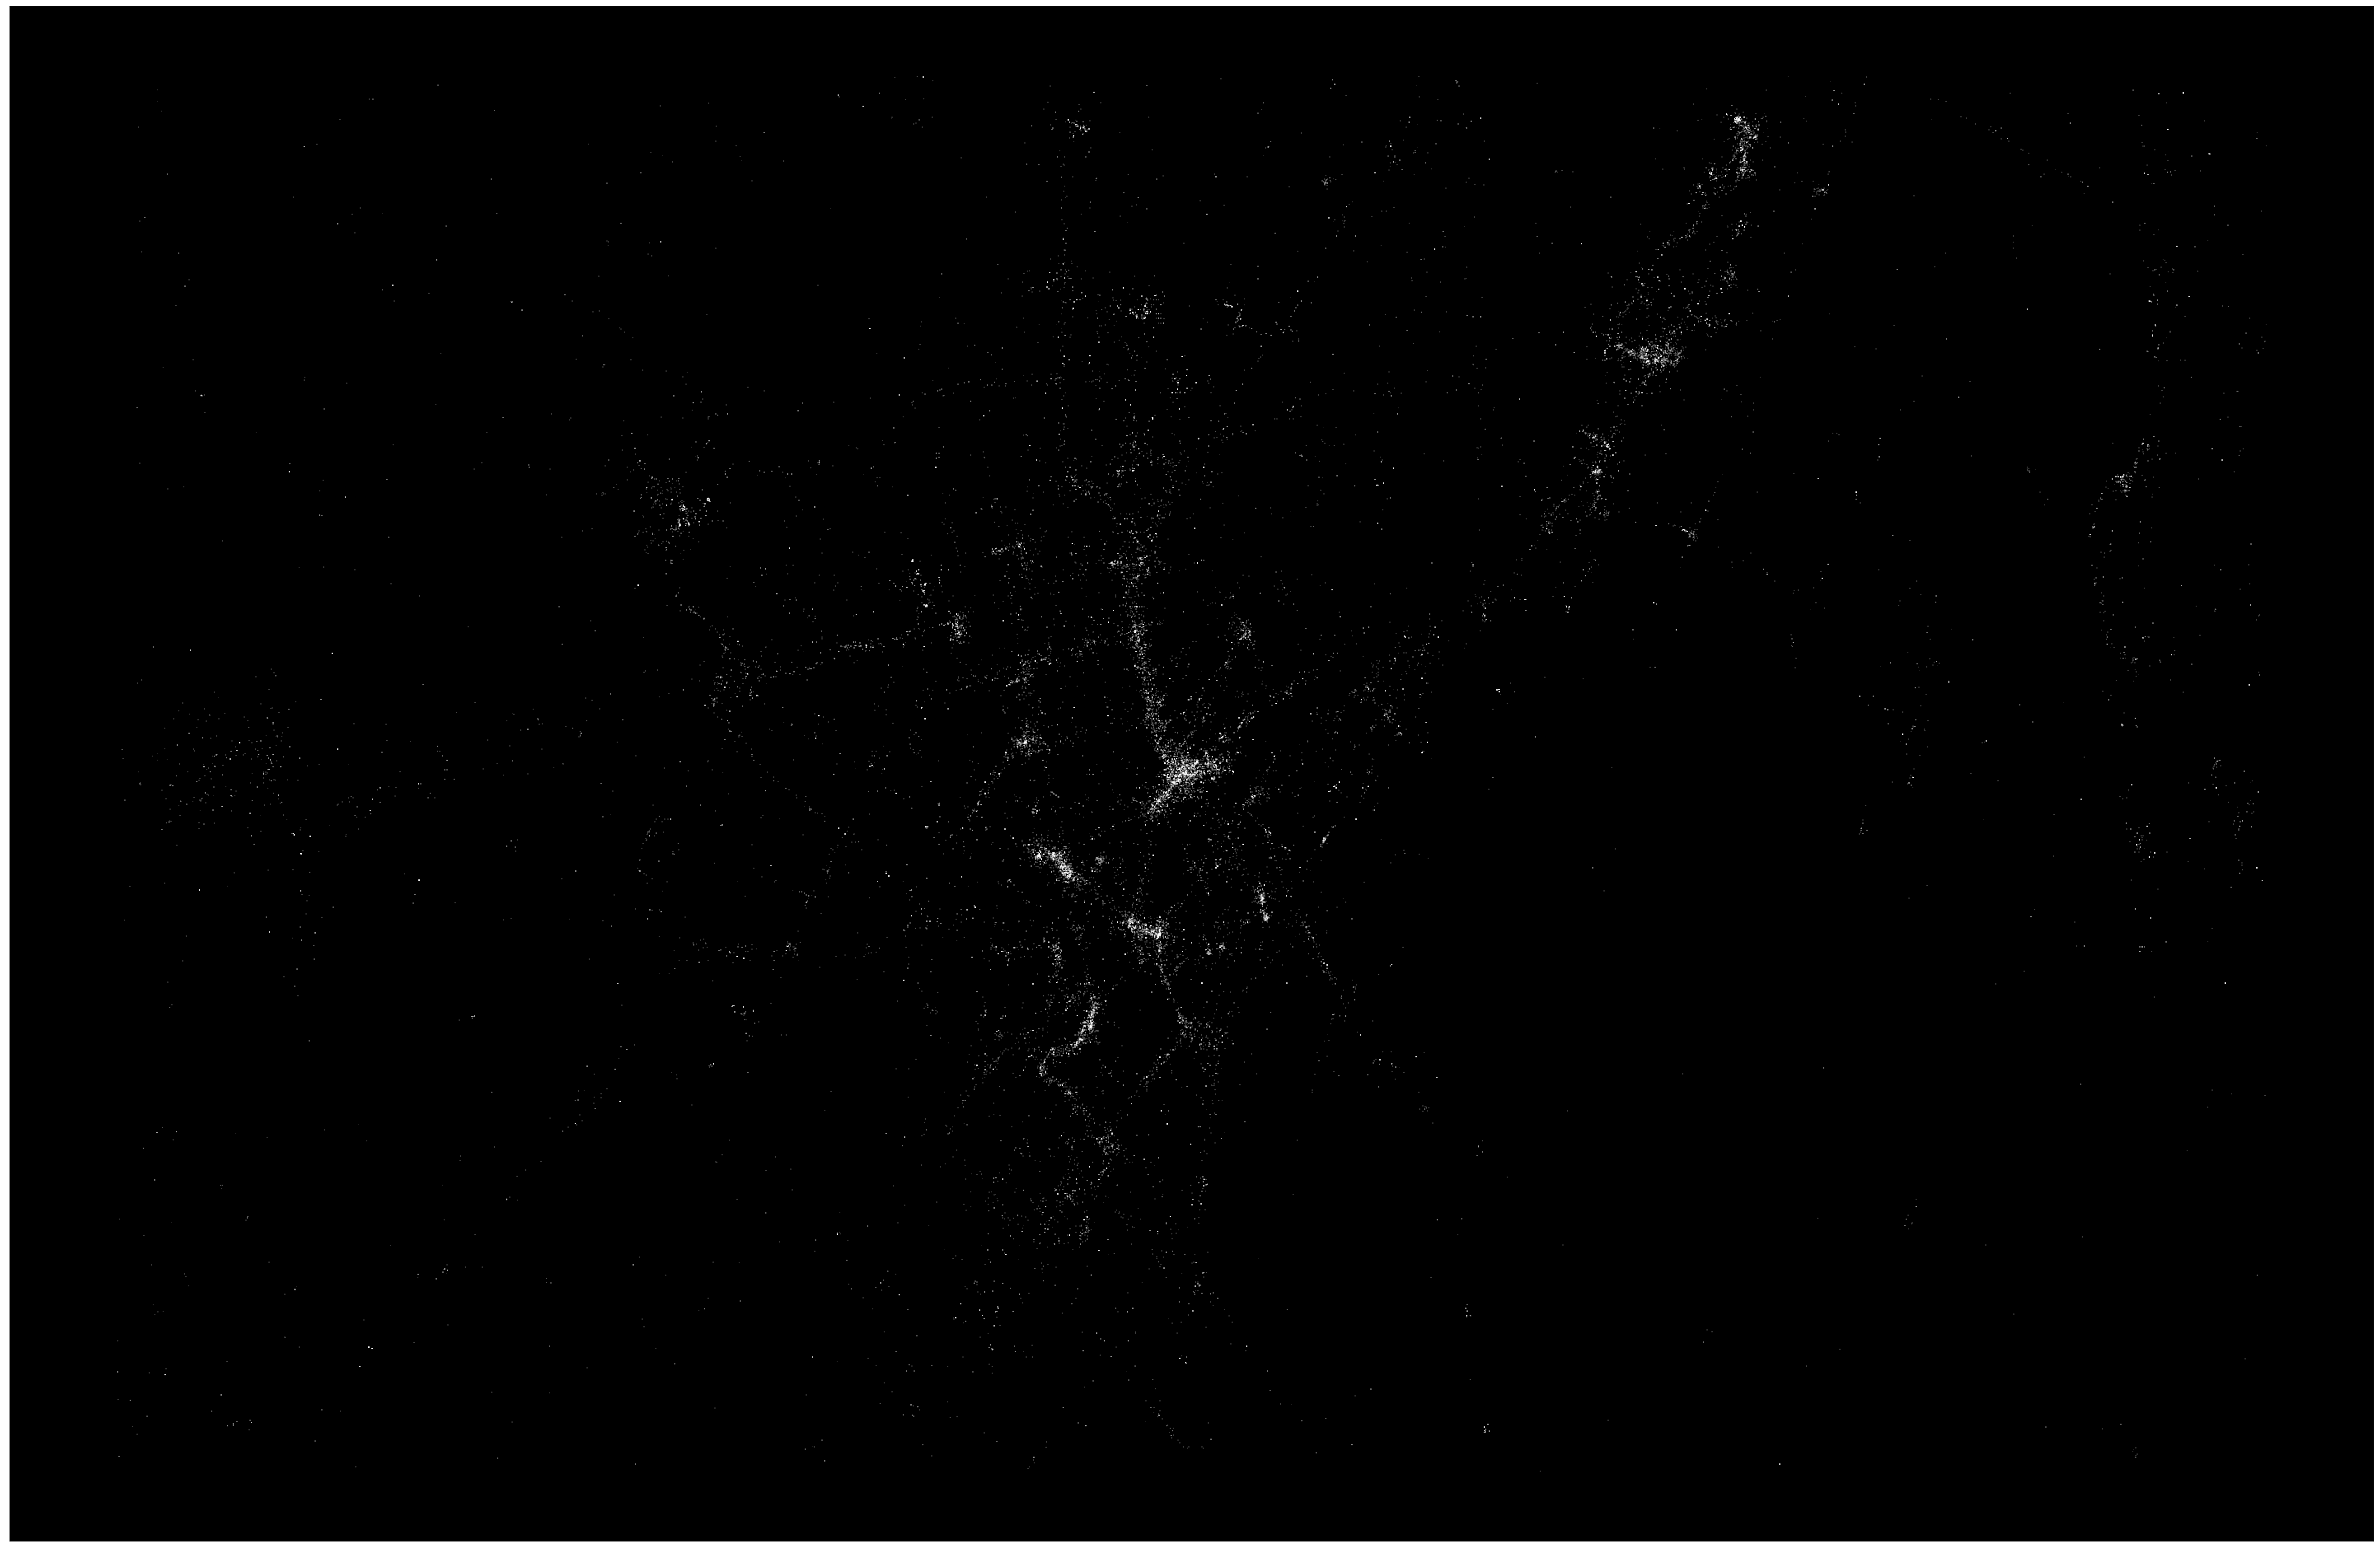

In [64]:
plt.figure(figsize=(45, 30), dpi=150)
ax = plt.axes()
ax.set_facecolor('black')

plt.scatter(x=points['longitude'], y=points['latitude'], c='white', alpha=0.7, s=0.03)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.show()